In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import rose

plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

In [2]:
energy = 50 # MeV
theta = np.array([200,-91.85])
training_points = np.array([
    [119.51219512195122, -14.634146341463415],
    [139.02439024390245, -4.878048780487805],
    [158.53658536585365, -48.78048780487805],
    [178.0487804878049, -117.07317073170732],
    [197.5609756097561, -131.70731707317074],
    [217.0731707317073, -126.82926829268293],
    [236.58536585365854, -82.92682926829268],
    [256.0975609756098, -175.609756097561],
    [275.609756097561, -19.51219512195122],
    [295.1219512195122, -170.73170731707316]
])

In [3]:
rbe = rose.ReducedBasisEmulator(
    rose.MN_Potential,
    training_points,
    energy,
    0
)

In [4]:
rbe.run_metrics('benchmark_data_MN_Potential_E_50.00_MeV.pkl', verbose=True);

Wave function residuals (root of sum of squares):
50% and 95% quantiles
1.5547e-01  9.4204e-01
Phase shift residuals (relative difference):
50% and 95% quantiles
4.8414e-03  3.4319e-02


In [5]:
se = rose.SchroedingerEquation(rose.MN_Potential)

In [6]:
r_mesh = np.linspace(1e-12, 30, 2000)
k = np.sqrt(2*rose.MN_Potential.mu*energy/rose.constants.HBARC)

phi = se.phi(energy, theta, k*r_mesh, 0)

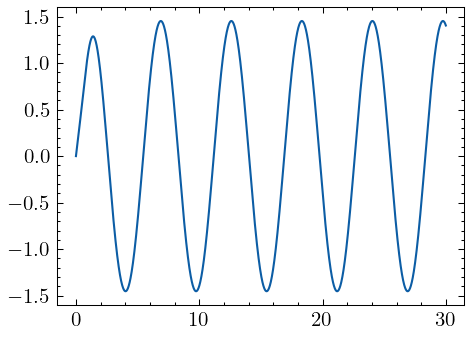

In [7]:
fig, ax = plt.subplots(dpi=150)
fig.patch.set_facecolor('white')

ax.plot(r_mesh, phi);